# Comparing RNN models on financial data


In [1]:
### Pour utiliser sur google colab

import os

from google.colab import drive
drive.mount('drive')

!mkdir -p drive -v
#!google-drive-ocamlfuse drive

cwd = os.getcwd()

Mounted at drive


In [2]:

monchemin = '/content/drive/MyDrive/TP-DL-RNN'

dir_path  = os.path.join(cwd, monchemin)
dirs = os.listdir(dir_path)
os.chdir(dir_path)

###  

In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Getting the data

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from tensorflow.keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [5]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [6]:
# First, we get the data
dataset = pd.read_csv('TP/stock-time-series-20050101-to-20171231/IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-01-03,82.45,82.55,80.81,82.06,11715200,IBM
2006-01-04,82.20,82.50,81.33,81.95,9840600,IBM
2006-01-05,81.40,82.90,81.00,82.50,7213500,IBM
2006-01-06,83.95,85.03,83.41,84.95,8197400,IBM
2006-01-09,84.10,84.25,83.38,83.73,6858200,IBM


In [7]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

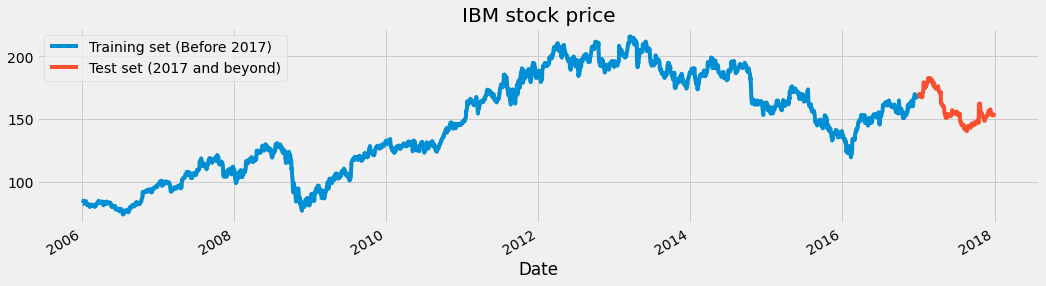

In [8]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [9]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# Experimental comparison

1. Perform learning and plot the predictions of a few learned models   

2. Extensive comparison

Compare SimpleRNN, GRU NNs, LSTM NNs in terms of performance (mse) vs number of parameters for a variery of models while trying to get the best performance for a given budget measured as the number of parameters.

Can you find a clear ranking of the three families of models ? 

3. Can these models be trained to perform prediction at a longer range ? For instance predicting the values of one full week ahead (the next 7 days) instead of predicting the value for the next only ?  
- Implement and test a strategy for testing one step ahead prediction for longer range prediction.
- Design implement and test a model for  learning such a long term prediction task.
     
     

# 1- LSTM NN


In [12]:
model = Sequential()

# Add a LSTM layer with 128 internal units.
model.add(LSTM(128,return_sequences=True, input_shape=(60,1)))

# Add dropout reguralisation
model.add(Dropout(0.2))

# Add second LSTM layer with 64 internal units.
model.add(LSTM(128,return_sequences=True))

# Add dropout reguralisation
model.add(Dropout(0.2))

# Add third LSTM layer with 64 internal units.
model.add(LSTM(128))

# Add dropout reguralisation
model.add(Dropout(0.2))

# Add a Dense layer with 10 units.
model.add(Dense(1))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 128)           66560     
_________________________________________________________________
dropout (Dropout)            (None, 60, 128)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 128)           131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [13]:
model.compile(optimizer='rmsprop',loss='mse')

In [14]:
model.fit(X_train,y_train, epochs=20)

Epoch 1/20
85/85 [==============================] - 21s 185ms/step - loss: 0.0250
Epoch 2/20
85/85 [==============================] - 16s 187ms/step - loss: 0.0093
Epoch 3/20
85/85 [==============================] - 16s 186ms/step - loss: 0.0066
Epoch 4/20
85/85 [==============================] - 16s 185ms/step - loss: 0.0054
Epoch 5/20
85/85 [==============================] - 16s 186ms/step - loss: 0.0048
Epoch 6/20
85/85 [==============================] - 16s 185ms/step - loss: 0.0043
Epoch 7/20
85/85 [==============================] - 16s 188ms/step - loss: 0.0040
Epoch 8/20
85/85 [==============================] - 16s 184ms/step - loss: 0.0036
Epoch 9/20
85/85 [==============================] - 16s 186ms/step - loss: 0.0030
Epoch 10/20
85/85 [==============================] - 16s 186ms/step - loss: 0.0030
Epoch 11/20
85/85 [==============================] - 16s 185ms/step - loss: 0.0026
Epoch 12/20
85/85 [==============================] - 16s 184ms/step - loss: 0.0026
Epoch 13/20
8

In [15]:
# Preparation des donnes Test

df_concat = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
test_values = df_concat[len(df_concat)-len(test_set) - 60:].values
test_values  = test_values.reshape(-1,1)
test_values   = sc.transform(test_values)

In [16]:
X_test = []
for i in range(60,311):
    X_test.append(test_values[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))


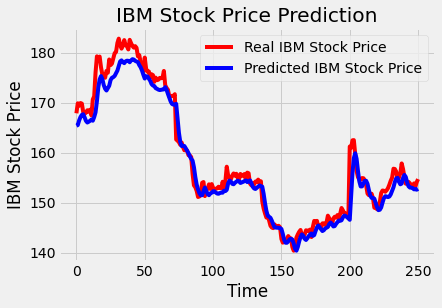

In [17]:
pred_lstm = model.predict(X_test)
pred_lstm = sc.inverse_transform(pred_lstm)

plot_predictions(test_set,pred_lstm)

In [18]:
print(return_rmse(test_set,pred_lstm))

The root mean squared error is 2.4737695816735803.
None


# GRU NN


In [19]:
model = Sequential()

# Add a GRU layer with 128 internal units.
model.add(GRU(128,return_sequences=True, input_shape=(60,1),activation='tanh'))

# Add dropout reguralisation
model.add(Dropout(0.2))

# Add second GRU layer.
model.add(GRU(128,return_sequences=True,activation='tanh'))

# Add dropout reguralisation
model.add(Dropout(0.2))

# Add third GRU layer.
model.add(GRU(128,activation='tanh'))

# Add dropout reguralisation
model.add(Dropout(0.2))

# Add a Dense layer with 10 units.
model.add(Dense(1))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru (GRU)                    (None, 60, 128)           50304     
_________________________________________________________________
dropout_3 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
gru_1 (GRU)                  (None, 60, 128)           99072     
_________________________________________________________________
dropout_4 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
gru_2 (GRU)                  (None, 128)               99072     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                

In [20]:
model.compile(optimizer='rmsprop',loss='mse')

In [21]:
model.fit(X_train,y_train, epochs=20)

Epoch 1/20
85/85 [==============================] - 18s 157ms/step - loss: 0.0191
Epoch 2/20
85/85 [==============================] - 13s 158ms/step - loss: 0.0087
Epoch 3/20
85/85 [==============================] - 13s 158ms/step - loss: 0.0059
Epoch 4/20
85/85 [==============================] - 13s 158ms/step - loss: 0.0051
Epoch 5/20
85/85 [==============================] - 13s 157ms/step - loss: 0.0044
Epoch 6/20
85/85 [==============================] - 13s 156ms/step - loss: 0.0040
Epoch 7/20
85/85 [==============================] - 13s 158ms/step - loss: 0.0036
Epoch 8/20
85/85 [==============================] - 14s 159ms/step - loss: 0.0033
Epoch 9/20
85/85 [==============================] - 14s 160ms/step - loss: 0.0033
Epoch 10/20
85/85 [==============================] - 14s 159ms/step - loss: 0.0029
Epoch 11/20
85/85 [==============================] - 13s 156ms/step - loss: 0.0027
Epoch 12/20
85/85 [==============================] - 13s 157ms/step - loss: 0.0025
Epoch 13/20
8

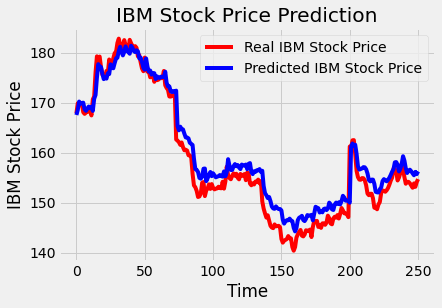

In [22]:
pred_gru = model.predict(X_test)
pred_gru = sc.inverse_transform(pred_gru)

plot_predictions(test_set,pred_gru)

In [23]:
print(return_rmse(test_set,pred_gru))

The root mean squared error is 2.749444627458682.
None


#SimpleRNN

In [24]:
from tensorflow.keras.layers import SimpleRNN

model = Sequential()

#Add a SimpleRNN layer with 128 units
model.add(SimpleRNN(128,return_sequences=True,input_shape=(60,1),activation='tanh'))

# Add a dropout Reguralisation
model.add(Dropout(0.2))

#Add a second SimpleRNN layer
model.add(SimpleRNN(128,return_sequences=True,activation='tanh'))

# Add a dropout Reguralisation
model.add(Dropout(0.2))

#Add a third SimpleRNN layer
model.add(SimpleRNN(128,activation='tanh'))

# Add a dropout Reguralisation
model.add(Dropout(0.2))

model.add(Dense(1))


model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 60, 128)           16640     
_________________________________________________________________
dropout_6 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 60, 128)           32896     
_________________________________________________________________
dropout_7 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_8 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

In [25]:
model.compile(optimizer='rmsprop',loss='mse')

In [26]:
model.fit(X_train,y_train,epochs=20)

Epoch 1/20
85/85 [==============================] - 8s 67ms/step - loss: 0.7656
Epoch 2/20
85/85 [==============================] - 6s 66ms/step - loss: 0.4307
Epoch 3/20
85/85 [==============================] - 6s 67ms/step - loss: 0.2622
Epoch 4/20
85/85 [==============================] - 6s 68ms/step - loss: 0.1014
Epoch 5/20
85/85 [==============================] - 6s 68ms/step - loss: 0.0389
Epoch 6/20
85/85 [==============================] - 6s 68ms/step - loss: 0.0175
Epoch 7/20
85/85 [==============================] - 6s 67ms/step - loss: 0.0111
Epoch 8/20
85/85 [==============================] - 6s 67ms/step - loss: 0.0077
Epoch 9/20
85/85 [==============================] - 6s 67ms/step - loss: 0.0061
Epoch 10/20
85/85 [==============================] - 6s 66ms/step - loss: 0.0055
Epoch 11/20
85/85 [==============================] - 6s 67ms/step - loss: 0.0049
Epoch 12/20
85/85 [==============================] - 6s 66ms/step - loss: 0.0045
Epoch 13/20
85/85 [==================

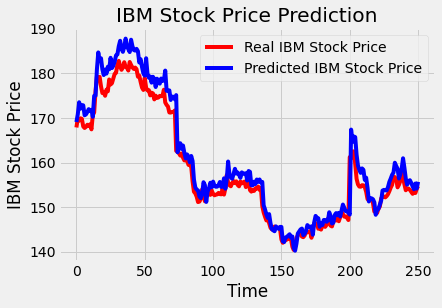

In [27]:
pred_srnn = model.predict(X_test)
pred_srnn = sc.inverse_transform(pred_srnn)

plot_predictions(test_set,pred_srnn)

In [28]:
print(return_rmse(test_set,pred_srnn))

The root mean squared error is 2.9753818615536813.
None


# Comparaison entre les trois modeles

| Modele | RMSE | ratio abs(LOG(RMSE/NBR Parametre))|
| :- | -: | :-: |
| LSTM NN | 3.99| 1.91
| GRU NN | 5.54 | 4.65
| SimpleRNN NN | 8.86 | 3.96

Le reseau de neurones constitué des couches **SimpleRNN** est celui avec le moins de parametres suivi de celui avec des couches **GRU** puis finalement celui avec des couches **LSTM**. On observe que le modele **LSTM NN** a l'erreur la plus basse suivi par **GRU NN** et apres **SimpleRNN NN**. Toutefois, si on prend en compte le nombre de parametre, le modele **LSTM NN** est le plus performant d'apres le rapport racine de l'erreur quadratique moyenne par nombre de paramatre.

Pour ce jeu de donnees et en prenant le rapport RMSE par nombre de parametres du modele, le modele **LSTM NN** est classe en premiere position. 
**SimpleRNN NN** est en deuxieme position et on trouve **GRU NN**, le moins performant, en derniere position.

# Longer Range Prediction

In [29]:
X_train = []
y_train = []
for i in range(60,2762):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i:i+7,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [30]:
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [31]:
print(X_train.shape)
print(y_train.shape)

(2702, 60, 1)
(2702, 7)


In [32]:
model = Sequential()

# Add a GRU layer with 128 internal units.
model.add(GRU(128,return_sequences=True, input_shape=(60,1),activation='tanh'))

# Add dropout reguralisation
model.add(Dropout(0.2))

# Add second GRU layer.
model.add(GRU(128,return_sequences=True,activation='tanh'))

# Add dropout reguralisation
model.add(Dropout(0.2))

# Add third GRU layer.
model.add(GRU(128,activation='tanh'))

# Add dropout reguralisation
model.add(Dropout(0.2))

# Add a Dense layer with 10 units.
model.add(Dense(7))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_3 (GRU)                  (None, 60, 128)           50304     
_________________________________________________________________
dropout_9 (Dropout)          (None, 60, 128)           0         
_________________________________________________________________
gru_4 (GRU)                  (None, 60, 128)           99072     
_________________________________________________________________
dropout_10 (Dropout)         (None, 60, 128)           0         
_________________________________________________________________
gru_5 (GRU)                  (None, 128)               99072     
_________________________________________________________________
dropout_11 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 7)                

In [33]:
model.compile(optimizer='rmsprop',loss='mse')

In [34]:
model.fit(X_train,y_train, epochs=20)

Epoch 1/20
85/85 [==============================] - 18s 158ms/step - loss: 0.0227
Epoch 2/20
85/85 [==============================] - 13s 156ms/step - loss: 0.0102
Epoch 3/20
85/85 [==============================] - 13s 158ms/step - loss: 0.0080
Epoch 4/20
85/85 [==============================] - 13s 158ms/step - loss: 0.0074
Epoch 5/20
85/85 [==============================] - 13s 155ms/step - loss: 0.0061
Epoch 6/20
85/85 [==============================] - 13s 158ms/step - loss: 0.0053
Epoch 7/20
85/85 [==============================] - 13s 157ms/step - loss: 0.0047
Epoch 8/20
85/85 [==============================] - 13s 156ms/step - loss: 0.0042
Epoch 9/20
85/85 [==============================] - 13s 159ms/step - loss: 0.0039
Epoch 10/20
85/85 [==============================] - 13s 158ms/step - loss: 0.0037
Epoch 11/20
85/85 [==============================] - 13s 157ms/step - loss: 0.0034
Epoch 12/20
85/85 [==============================] - 13s 158ms/step - loss: 0.0034
Epoch 13/20
8

In [35]:
pred_range = model.predict(X_test)
pred_range = sc.inverse_transform(pred_range)

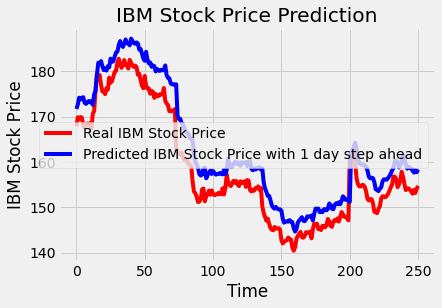

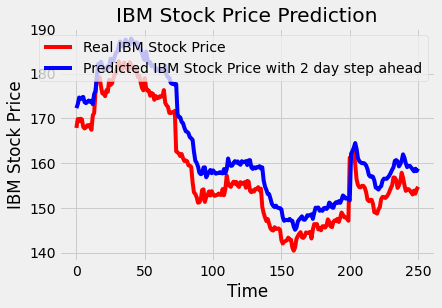

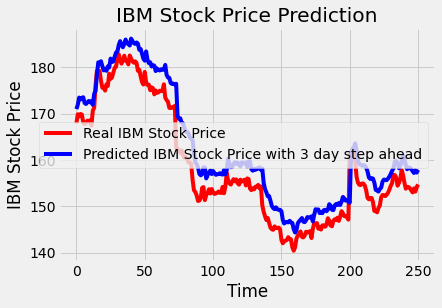

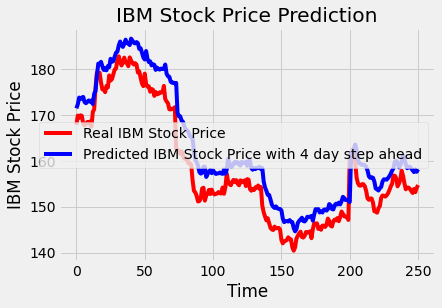

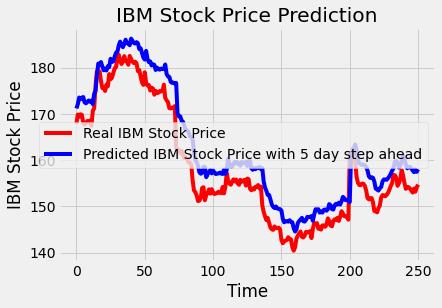

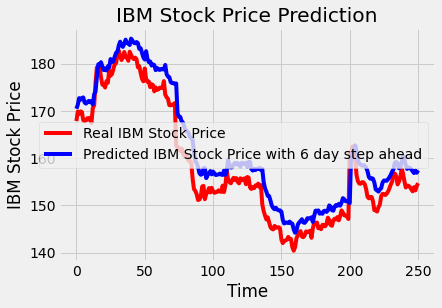

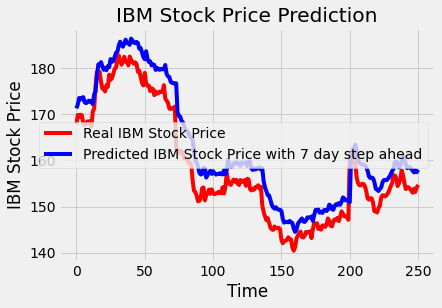

In [36]:
for i in range(1,8):
  plt.plot(test_set, color='red',label='Real IBM Stock Price')
  plt.plot(pred_range[:,i-1], color='blue',label='Predicted IBM Stock Price with '+str(i)+' day step ahead')
  plt.title('IBM Stock Price Prediction')
  plt.xlabel('Time')
  plt.ylabel('IBM Stock Price')
  plt.legend()
  plt.show()

In [37]:
for i in range(1,8):
  print("The root mean squared error for "+ str(i)+" day step ahead is {}".format(math.sqrt(mean_squared_error(test_set, pred_range[:,i-1]))))

The root mean squared error for 1 day step ahead is 4.940959598312243
The root mean squared error for 2 day step ahead is 5.408523257653325
The root mean squared error for 3 day step ahead is 4.4137496609199
The root mean squared error for 4 day step ahead is 4.778326277321992
The root mean squared error for 5 day step ahead is 4.596622939333167
The root mean squared error for 6 day step ahead is 4.029302796864218
The root mean squared error for 7 day step ahead is 4.616300640109477
